In [1]:
# Data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning: data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Machine learning: model building and pipelining
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Machine learning: model training and evaluation utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

# Outline your approach and strategy for the project:
## Load the data and display statistical observations, for understanding of the data structure and content.
1. Load the data
2. Display EDA observations
3. Apply data preprocessing
4. Split the data into training and testing sets
5. Build and train a machine learning model
6. Evaluate the model


## Identify the problem
in this case, i treated the problem as a binary classification problem, where the goal is to predict if Itamar is located in Niza or not.


## Model that solve the problem
Due to the challenge of a very limited data, and even more limited time, I chose to use a simple logistic regression model that can be trained quickly and provide a baseline for further improvements.


## Evaluation of the model
Since we do not want to make mistakes in predicting Itamar's location, we need to evaluate the model's performance using precision which is more sensitive to false positives. we will also look on the F1-score which is the harmonic mean of precision and recall and ROC curve.


# Specify also a plan for a longer (few months project).

## Improve the model
In the future, we can improve the model by using firstly a better feature selection and engineering. In this solution i used a simple feature selection and engineering, but in the future we can use more advanced techniques like PCA, LDA, and more. Additionally, we can test other architectures like Random Forest, XGBoost and choose the best one.

## A different approach
In this case, instead of using logistic regression, we could calculate the Niza area (with the given data) and then calculating the distance between Itamar and Niza. If the distance is less than a certain threshold, we can predict that Itamar is in Niza.

# My Solution

# Exploritory Data Analysis

## Load the Data and Display statistical observatios

In [2]:
# Load data from CSV
file_path = 'Itamar Data - data.csv'
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
print(data.head())


   Set #           time (IL)        lat       long  speed  heading  hdop  \
0      1  03/17/2024 8:38:25  32.272747  34.908516      0       83  0.02   
1      1  03/17/2024 8:38:50  32.272747  34.908516      0      163  0.03   
2      1  03/17/2024 8:39:10  32.272747  34.908516      0       33  0.02   
3      1  03/17/2024 8:39:35  32.272747  34.908516      0      145  0.02   
4      1  03/17/2024 8:40:06  32.272705  34.908543      0      149  0.01   

   satellites  batteryPct  chargingVoltage  mmc  mnc    lac      cid  steps  \
0          16          97                0  425    1  10224  1473382  35985   
1          14          97                0  425    1  22421  2068481      0   
2          13          97                0  425    1  22421  2068481  35985   
3          15          96                0  425    1  22421  2068489  35985   
4          16          96                0  425    1  22421  8970250  35985   

  locationSource                                              wifis 

In [4]:
# Get a concise summary of the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Set #            650 non-null    int64  
 1   time (IL)        650 non-null    object 
 2   lat              650 non-null    float64
 3   long             650 non-null    float64
 4   speed            650 non-null    int64  
 5   heading          650 non-null    int64  
 6   hdop             650 non-null    float64
 7   satellites       650 non-null    int64  
 8   batteryPct       650 non-null    int64  
 9   chargingVoltage  650 non-null    int64  
 10  mmc              650 non-null    int64  
 11  mnc              650 non-null    int64  
 12  lac              650 non-null    int64  
 13  cid              650 non-null    int64  
 14  steps            650 non-null    int64  
 15  locationSource   650 non-null    object 
 16  wifis            574 non-null    object 
 17  segmentType     

## Chage labels to binary numeric values

In [5]:
# Transform 'placeName' where 'Niza' is 0 and all other values are 1
data['placeName'] = data['placeName'].apply(lambda x: 0 if x == 'Niza' else 1)

# Check the transformation
print(data['placeName'].value_counts())

placeName
1    333
0    317
Name: count, dtype: int64


In [6]:
# Generate descriptive statistics
print(data.describe())

            Set #         lat        long       speed     heading        hdop  \
count  650.000000  650.000000  650.000000  650.000000  650.000000  650.000000   
mean     9.453846   32.266834   34.907193    8.780000  108.453846    0.052426   
std      6.170300    0.024010    0.006602   16.030669  111.931819    0.049923   
min      1.000000   32.144341   34.882599    0.000000    0.000000    0.010000   
25%      4.000000   32.272575   34.907594    0.000000    0.000000    0.020000   
50%      9.000000   32.272720   34.908642    0.000000   90.000000    0.030000   
75%     14.000000   32.272864   34.908833   13.000000  191.750000    0.100000   
max     21.000000   32.285297   34.922394   96.000000  359.000000    0.566667   

       satellites  batteryPct  chargingVoltage         mmc         mnc  \
count  650.000000  650.000000       650.000000  650.000000  650.000000   
mean    14.747692   51.413846         0.338462  423.038462    0.995385   
std      5.550805   27.105162         1.257053  

## Observe continous and categorical data

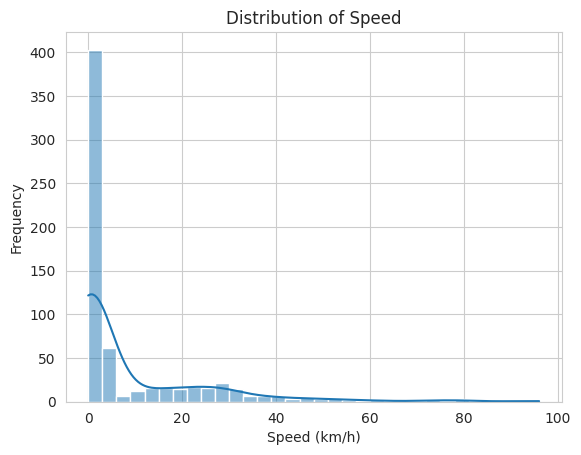

In [7]:
# Histograms or density plots for continuous variables
sns.histplot(data['speed'], kde=True)
plt.title('Distribution of Speed')
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

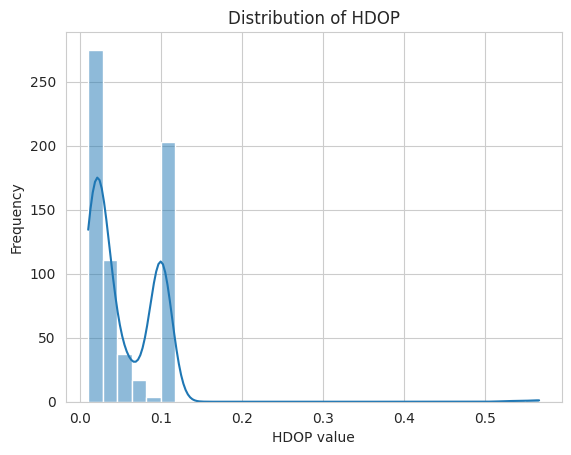

In [8]:
# Histograms or density plots for continuous variables

sns.histplot(data['hdop'], kde=True)
plt.title('Distribution of HDOP')
plt.xlabel('HDOP value')
plt.ylabel('Frequency')
plt.show()

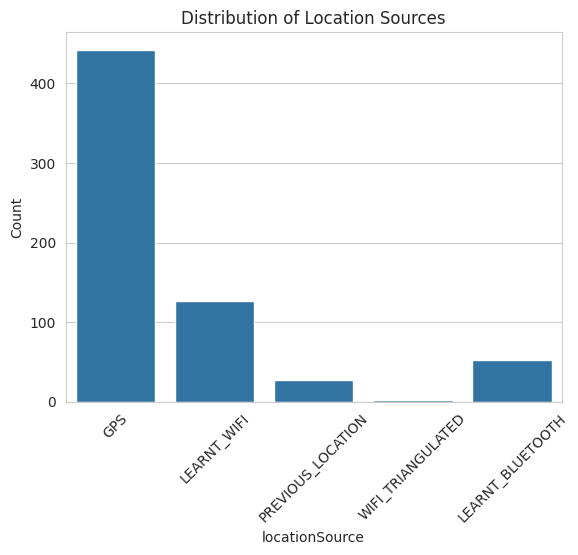

In [9]:
# Count plot for categorical data like location source
sns.countplot(x='locationSource', data=data)
plt.title('Distribution of Location Sources')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

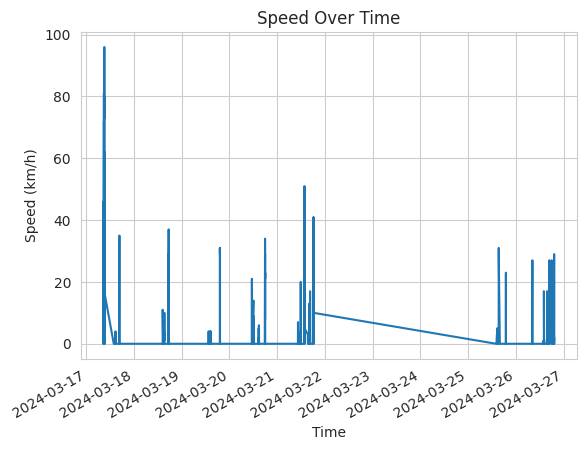

In [10]:
# Ensure that the 'time' column is in datetime format
data['time (IL)'] = pd.to_datetime(data['time (IL)'])

# Set time as the index
data.set_index('time (IL)', inplace=True)

# Plot time series data
data['speed'].plot()
plt.title('Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Speed (km/h)')
plt.show()

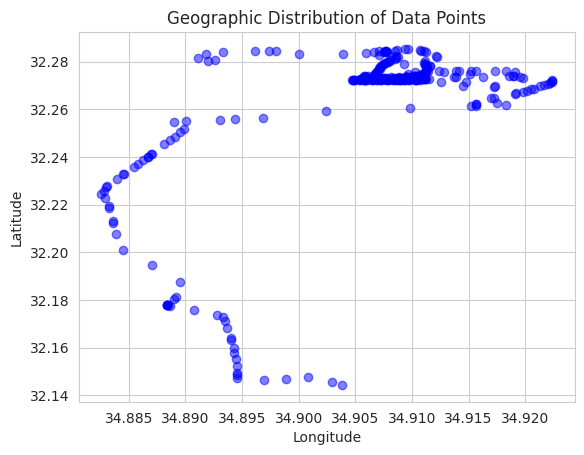

In [11]:
# Plot the geographic distribution of data points
plt.scatter(data['long'], data['lat'], c='blue', alpha=0.5)
plt.title('Geographic Distribution of Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

## Test for correlations

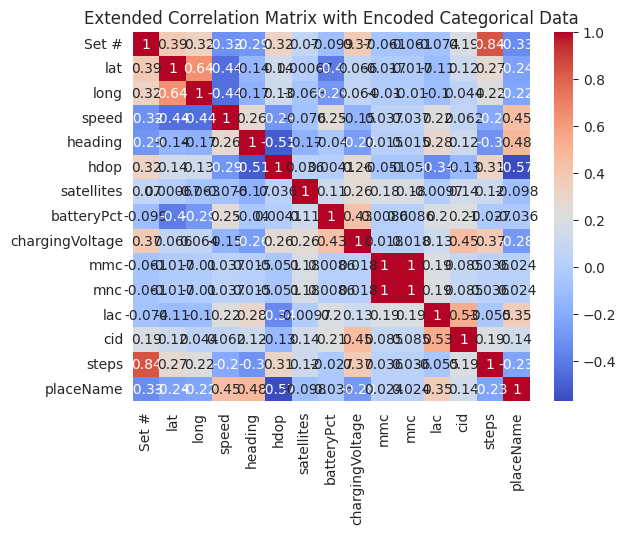

In [12]:
# Convert categorical variable 'locationSource' into dummy/indicator variables
categorical_encoded = pd.get_dummies(data['locationSource'], prefix='source')

# Concatenate the original data with the encoded DataFrame
data_encoded = pd.concat([data, categorical_encoded], axis=1)

# Drop the original 'locationSource' column
data_encoded.drop('locationSource', axis=1, inplace=True)

# Recompute correlation matrix including encoded variables
correlation_matrix = data_encoded.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Extended Correlation Matrix with Encoded Categorical Data')
plt.show()

## Test highly correlated features


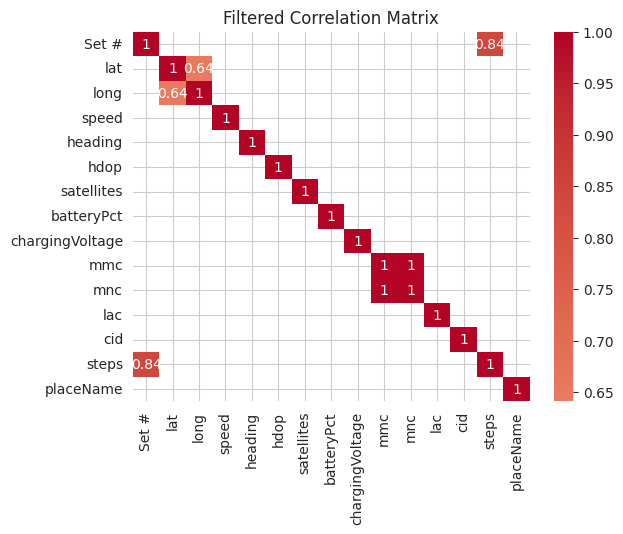

In [13]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Apply a mask to zero-out correlations below the threshold of interest
threshold = 0.60
filtered_correlation_matrix = correlation_matrix.where(
    (correlation_matrix >= threshold) | (correlation_matrix <= -threshold)
)

# Remove NaN values in the filtered matrix and plot the heatmap
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Filtered Correlation Matrix')
plt.show()


# Data Preprocessing

## Features Engineering

In [14]:
# Drop highly correlated features set# and mnc
data.drop(['Set #', 'mnc'], axis=1, inplace=True)

In [15]:
# delete rows with lac	cid	steps = 0 (meaningless data)
data = data[(data['lac'] != 0) & (data['cid'] != 0) & (data['steps'] != 0)]


## Convert categorical variables

In [16]:
# extracting the number of WiFi connections
data['wifi_count'] = data['wifis'].apply(lambda x: 0 if x == 'null' else len(str(x).split(',')))

# Encoding categorical variables
categorical_features = ['locationSource']
one_hot = OneHotEncoder()

In [17]:
# Scale the numeric features
scaler = StandardScaler()

In [18]:
# list the features
print(data.columns)

Index(['lat', 'long', 'speed', 'heading', 'hdop', 'satellites', 'batteryPct',
       'chargingVoltage', 'mmc', 'lac', 'cid', 'steps', 'locationSource',
       'wifis', 'segmentType', 'placeName', 'wifi_count'],
      dtype='object')


In [19]:
# choose the numeric features for the model to scale for training
features = ['wifi_count', 'speed', 'hdop', 'satellites', 'steps']

In [20]:
# Combine one-hot encoding and scaling within a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot, categorical_features),
        ('num', scaler, features)
    ])

# Create a pipeline that combines the preprocessor with the logistic regression model
classifier_model = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', LogisticRegression())])



In [21]:
# Feature matrix and target vector
X = data.drop('placeName', axis=1)
y = data['placeName']

## Split the Data

In [22]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Building and Training the Logistic Regression Model

In [23]:
classifier_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['locationSource']),
                                                 ('num', StandardScaler(),
                                                  ['wifi_count', 'speed',
                                                   'hdop', 'satellites',
                                                   'steps'])])),
                ('classifier', LogisticRegression())])

## Predictions on the Test Set

In [24]:
# Predictions and Evaluation
y_pred = classifier_model.predict(X_test)

# Model Evaluation

## Classification Report

In [25]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.69      0.76        77
           1       0.79      0.91      0.84        97

    accuracy                           0.81       174
   macro avg       0.82      0.80      0.80       174
weighted avg       0.82      0.81      0.81       174



## Confusion Matrix

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[53 24]
 [ 9 88]]


## We can see from the confusion matrix that there are 24 false negative case which my be very dangerous. we need to improve the model to reduce the false negative cases.

## Visualization

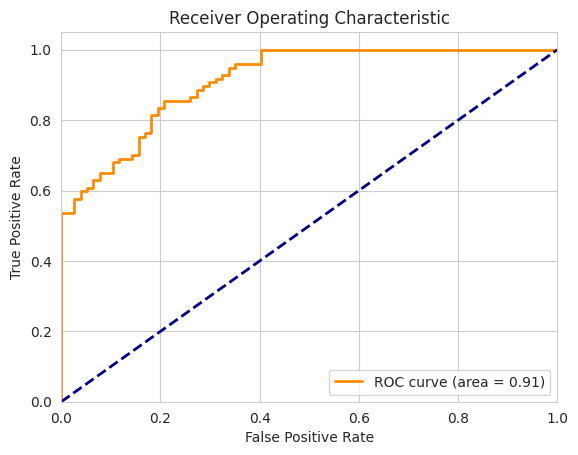

In [27]:
# Calculate ROC curve from y_test and y_pred
fpr, tpr, thresholds = roc_curve(y_test, classifier_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Conclusion
The model achieved an accuracy of 0.79 for Itamar being outside if Niza and 0.85 for Itamar being in Niza. It is not a very good result since we do not want to make mistakes in predicting Itamar's location. but it is a good start for a simple baseline model.
ROC curve of 0.91 shows that  An AUC of 0.91 means that there is a 91% chance that the model will be able to distinguish between a randomly chosen positive instance and a negative instance.